<a href="https://colab.research.google.com/github/Batovs/Parque-Lajeado_Analise-Flora/blob/main/An%C3%A1lise_Flora_Parque_Lajeado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [192]:
#Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from palettable.scientific.sequential import Bamako_16
import textwrap

In [193]:
def wrap_labels(ax, width, break_long_words=False):
  '''Função para quebrar as legendas dos eixos'''
  labels = []
  for label in ax.get_xticklabels():
      text = label.get_text()
      labels.append(textwrap.fill(text, width=width,
                    break_long_words=break_long_words))
  ax.set_xticklabels(labels, rotation=0)

In [194]:
url = "https://raw.githubusercontent.com/Batovs/Parque-Lajeado_Analise-Flora/main/Levantamento%20Parque%20lajeado%202021.csv"

In [195]:
df = pd.read_csv(url,sep=';',encoding='latin1')
df

,Parque Lajeado - Izaura Pereira de Souza Franzolin. Flora: última atualização do Herbário Municipal (PMSP) em 15/07/2021\nGRUPO / FAMÍLIA / Espécie,nome popular,fonte de dados,hábito,status de conservação,origem,guia
0,ANGIOSPERMAS,NaN,NaN,NaN,NaN,NaN,NaN
1,ACANTHACEAE,NaN,NaN,NaN,NaN,NaN,NaN
2,Eranthemum pulchellum Andrews,camarão-azul,V,ee,NaN,c,NaN
3,Odontonema tubaeforme (Bertol.) Kuntze,odontonema,H,arb,NaN,c,NaN
4,Sanchezia oblonga Ruiz & Pav.,sanquésia,V,arb,NaN,c,NaN
...,...,...,...,...,...,...,...
175,Neoblechnum brasiliense (Desv.) Gasper & V.A.O...,samambaia-do- brejo,V,eros,NaN,n,NaN
176,CYATHEACEAE,NaN,NaN,NaN,NaN,NaN,NaN
177,Cyathea sp.,samambaiuçu,V,fa,NaN,n,NaN
178,LYGODIACEAE,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
#Dicinários das Legendas
#Legenda Hábito
habito = {
          'arb':'arbusto', 'árv':'árvore', 'avt':'arvoreta',
          'b':'bambu', 'dr':'dracenoide', 'eces':'erva cespitosa',
          'ee':'erva ereta', 'eriz':'erva rizomatosa', 
          'fa': 'feto arborescente', 'he':'hemiepifita',
          'pc':'palmeira cespitoso', 'pu':'palmeira único', 'tr':'trepadeira',
          'suba':'subarousto', 'eros':'erva rosulada', 'era':'erva rastejante'
        }

#Legenda Fonte de Dados
fonte_dados = {'V':'Vistoria sem inclusão', 
               'H':'Amostra incluída no Herbário Municipal'}

#Legenda Origem
origem = {
          'n': 'nativa no município de São Paulo',
          'c': 'exótica cultivada',	
          'd': 'dúvida se é nativa no MSP',
          's': 'exótica subespontânea',
          'i': 'exótica invasora',
          }         




In [197]:
df = df.replace({'hábito':habito})
df = df.replace({'fonte de dados':fonte_dados})
df = df.replace({'origem':origem})

In [198]:
df.count()

Parque Lajeado - Izaura Pereira de Souza Franzolin. Flora: última atualização do Herbário Municipal (PMSP) em 15/07/2021\nGRUPO / FAMÍLIA / Espécie    180
nome popular                                                                                                                                           105
fonte de dados                                                                                                                                         126
hábito                                                                                                                                                 126
status de conservação                                                                                                                                    5
origem                                                                                                                                                 126
guia                                                                  

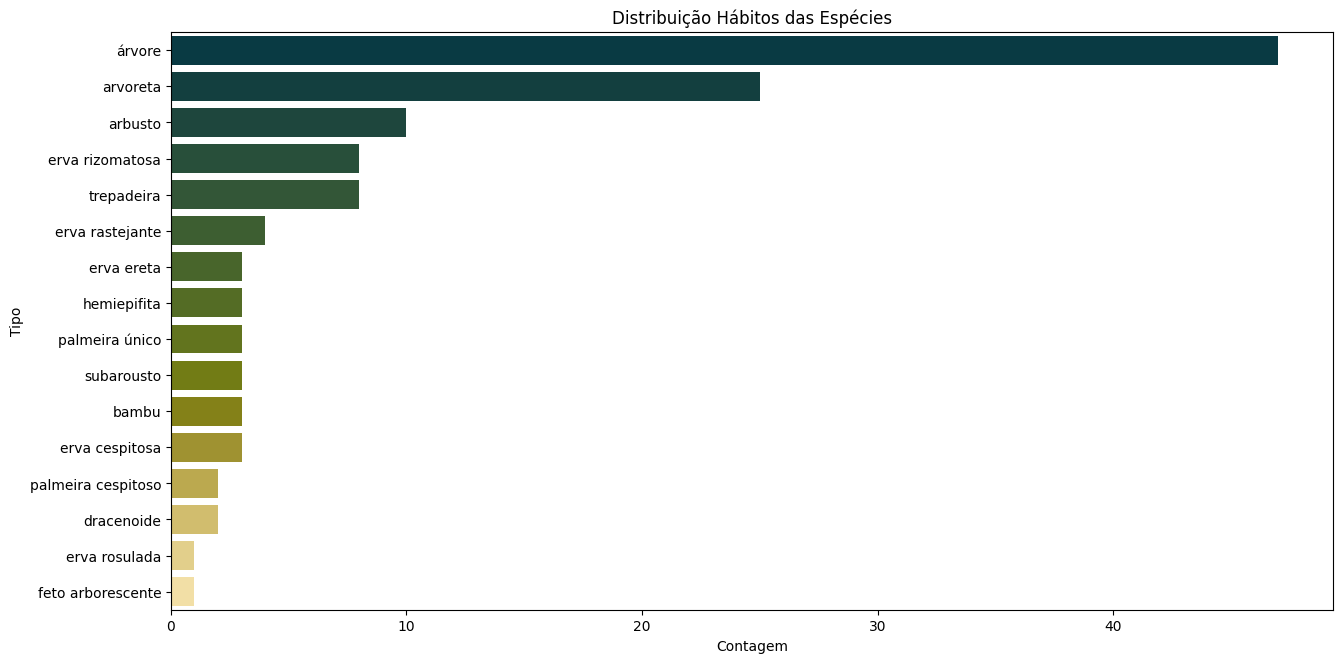

In [199]:
from palettable.scientific.sequential import Bamako_16 #Paleta de cores
#https://jiffyclub.github.io/palettable/


#Gráfico de Barras dos hábitos
fig, ax = plt.subplots(figsize=(15,7.5))
valores = df['hábito'].dropna().value_counts().reset_index()


# Criar o gráfico de colunas com seaborn
sns.barplot(data=valores, x='hábito', y='index', palette=Bamako_16.mpl_colors)


# Adicionar rótulos e título
plt.xlabel('Contagem')
plt.ylabel('Tipo')
plt.title('Distribuição Hábitos das Espécies')


plt.savefig('Distribuição Hábitos das Espécies')
plt.show()

In [200]:
valores = df['hábito'].dropna().value_counts()
valores

árvore                47
arvoreta              25
arbusto               10
erva rizomatosa        8
trepadeira             8
erva rastejante        4
erva ereta             3
hemiepifita            3
palmeira único         3
subarousto             3
bambu                  3
erva cespitosa         3
palmeira cespitoso     2
dracenoide             2
erva rosulada          1
feto arborescente      1
Name: hábito, dtype: int64

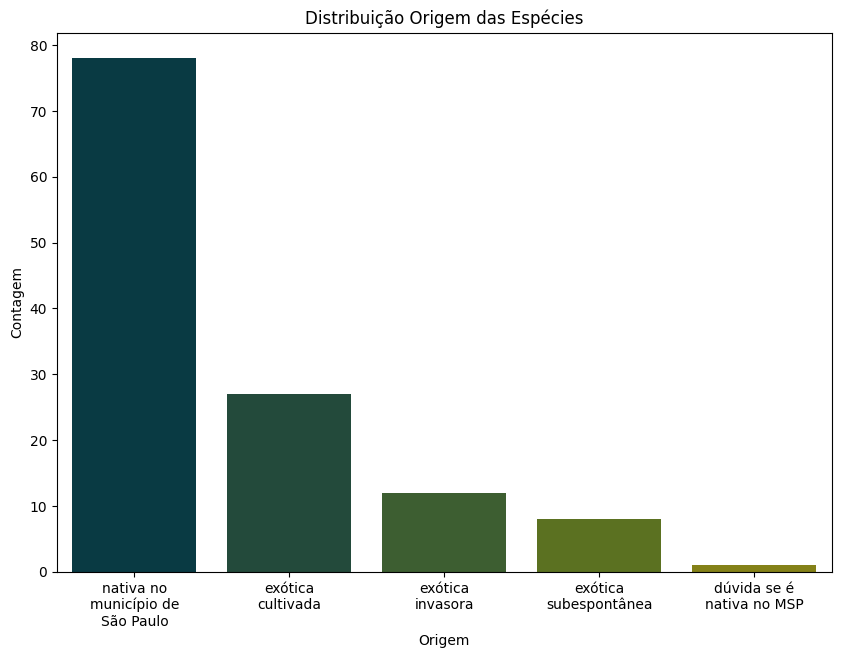

In [201]:
#Gráfico de Barras da Origem
from palettable.scientific.sequential import Bamako_7 #Paleta de cores

fig, ax = plt.subplots(figsize=(10,7))
valores = df['origem'].dropna().value_counts().reset_index()


# Criar o gráfico de colunas com seaborn
sns.barplot(data=valores, x='index', y='origem', palette=Bamako_7.mpl_colors)


# Adicionar rótulos e título
plt.xlabel('Origem')
plt.ylabel('Contagem')
plt.title('Distribuição Origem das Espécies')

# Quebrar as legendas do eixo X
wrap_labels(ax, 15)

plt.savefig('Distribuição Origem das Espécies')
plt.show()

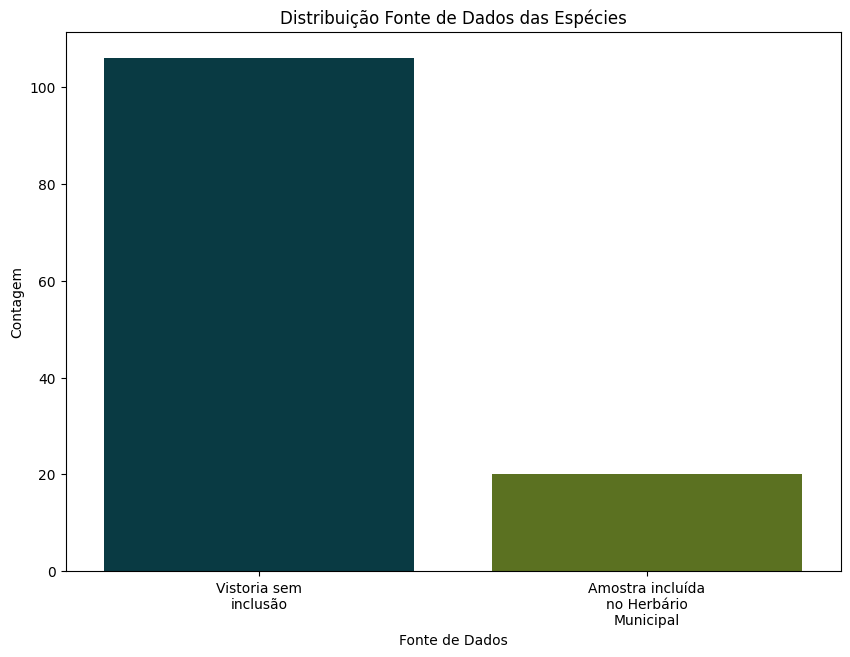

In [202]:
#Gráfico de Barras da Fonte de dados
from palettable.scientific.sequential import Bamako_3 #Paleta de cores

fig, ax = plt.subplots(figsize=(10,7))
valores = df['fonte de dados'].dropna().value_counts().reset_index()


# Criar o gráfico de colunas com seaborn
sns.barplot(data=valores, x='index', y='fonte de dados', palette=Bamako_3.mpl_colors)


# Adicionar rótulos e título
plt.xlabel('Fonte de Dados')
plt.ylabel('Contagem')
plt.title('Distribuição Fonte de Dados das Espécies')

# Quebrar as legendas do eixo X
wrap_labels(ax, 17)

plt.savefig('Distribuição Fonte de Dados das Espécies')
plt.show()